<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/S%C3%A9rie_temporelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip intall giotto-tda
!pip install gudhi
!pip install umap-learn
!pip install POT

ERROR: unknown command "intall" - maybe you meant "install"
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 13.8 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi
from gudhi.point_cloud.timedelay import TimeDelayEmbedding #tranformer  une serie temporelles en nuage de pts



créé plusieurs chemins

In [15]:
# On créé 2 Dataset de tailles (nbre_serie_temp, temps)

gaussian1 = np.random.normal(loc =0, scale = 1, size = (200, 100))
gaussian2 = np.random.normal(loc =0, scale = 2, size = (200, 100))

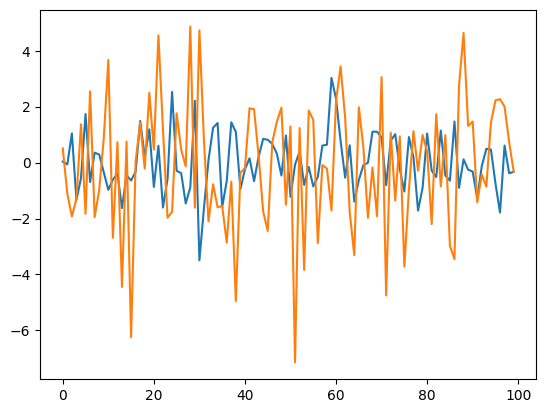

In [16]:
plt.plot(gaussian1[0])
plt.plot(gaussian2[0])
plt.show()

on va transformer ça en image de pts en "dim" dimensions , donc chaque pt est donné par $(X_t, X_{t-delay})$

In [18]:
TD = TimeDelayEmbedding(dim = 2, delay =1, skip = 1)
TD1 = TD.transform(TD.transform(gaussian1))
TD2 = TD.transform(TD.transform(gaussian2))

np.array(TD1).shape

(200, 99, 2)

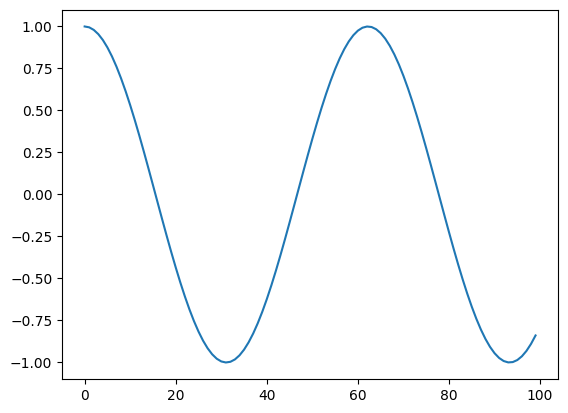

In [19]:
###Ilustration plus parlante

TS = np.cos(np.linspace(0, 10, 100))
plt.plot(TS)
plt.show()

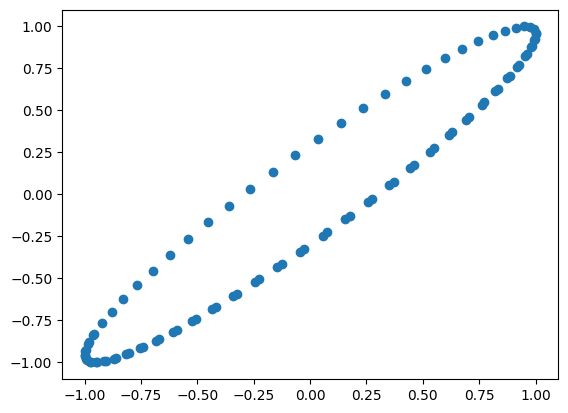

In [20]:
TD = TimeDelayEmbedding(dim = 2, delay = 3, skip = 1)
TD_cos = TD.transform([TS])
plt.scatter(TD_cos[0][:,0], TD_cos[0][:,1])

Por chaque nuage de pt
(correspondant à une série temporelle ) on crée le complexe de Rips et sa persistence de dimension 1.

In [21]:
from tqdm import tqdm

dgms1 = []

for pc in tqdm(TD1):
  rips = gudhi.RipsComplex(points = pc).create_simplex_tree(max_dimension=2)
  rips.compute_persistence()
  dgms1.append(rips.persistence_intervals_in_dimension(1))

100%|██████████| 200/200 [00:16<00:00, 11.81it/s]


In [22]:
from tqdm import tqdm

dgms2 = []

for pc in tqdm(TD2):
  rips = gudhi.RipsComplex(points = pc).create_simplex_tree(max_dimension=2)
  rips.compute_persistence()
  dgms2.append(rips.persistence_intervals_in_dimension(1))

100%|██████████| 200/200 [00:17<00:00, 11.54it/s]


Je vais crée la persistence pr chaque série temporelle. Prodejjtte en 2 dim s'il ya des digrammes de persistence qui separe les 2

In [25]:
from gudhi import bottleneck_distance
from gudhi.wasserstein import wasserstein_distance

In [27]:


dgms = dgms2 + dgms1
label =[1]*len(dgms1) +[0]*len(dgms2)
B = np.zeros((len(dgms), len(dgms)))


for i in range(len(dgms)):
  for j in range(i):
    B[i,j] = wasserstein_distance(dgms[i], dgms[j])
    print((i,j))

B += B.T

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(387, 109)
(387, 110)
(387, 111)
(387, 112)
(387, 113)
(387, 114)
(387, 115)
(387, 116)
(387, 117)
(387, 118)
(387, 119)
(387, 120)
(387, 121)
(387, 122)
(387, 123)
(387, 124)
(387, 125)
(387, 126)
(387, 127)
(387, 128)
(387, 129)
(387, 130)
(387, 131)
(387, 132)
(387, 133)
(387, 134)
(387, 135)
(387, 136)
(387, 137)
(387, 138)
(387, 139)
(387, 140)
(387, 141)
(387, 142)
(387, 143)
(387, 144)
(387, 145)
(387, 146)
(387, 147)
(387, 148)
(387, 149)
(387, 150)
(387, 151)
(387, 152)
(387, 153)
(387, 154)
(387, 155)
(387, 156)
(387, 157)
(387, 158)
(387, 159)
(387, 160)
(387, 161)
(387, 162)
(387, 163)
(387, 164)
(387, 165)
(387, 166)
(387, 167)
(387, 168)
(387, 169)
(387, 170)
(387, 171)
(387, 172)
(387, 173)
(387, 174)
(387, 175)
(387, 176)
(387, 177)
(387, 178)
(387, 179)
(387, 180)
(387, 181)
(387, 182)
(387, 183)
(387, 184)
(387, 185)
(387, 186)
(387, 187)
(387, 188)
(387, 189)
(387, 190)
(387, 191)
(387, 192

In [28]:
from umap import UMAP
mapper_umap_bn = UMAP(metric="precomputed", init ='random').fit(B)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


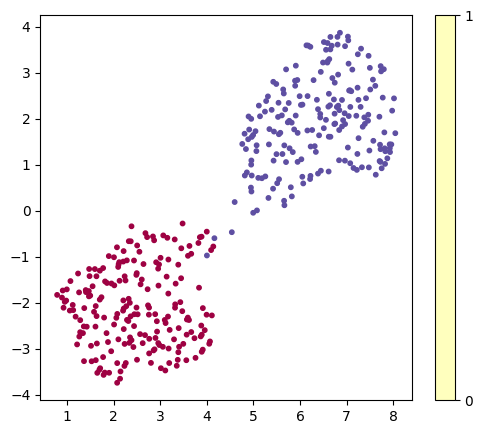

In [29]:
plt.figure(figsize=(6,5))
plt.scatter(*mapper_umap_bn.embedding_.T, s =10, c=label, cmap = 'Spectral')
cbar = plt.colorbar(boundaries=np.arange(2))
cbar.set_ticks(np.arange(2))

On va vectorialsise le pb en passant par les fonctions landscape.

In [32]:
from gudhi.representations import Landscape

LS = Landscape()
LS_train = LS.fit_transform(dgms)


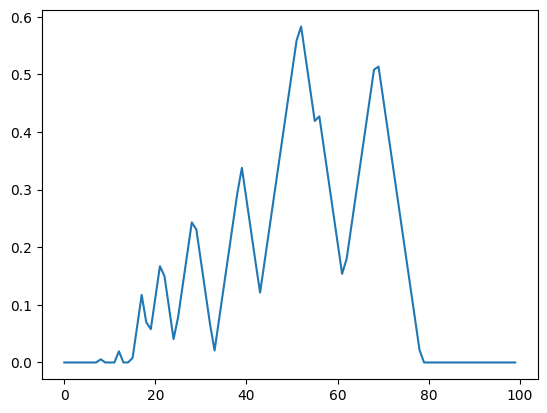

In [34]:
plt.plot(LS_train[0][:100])

Regression logistique

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(LS_train, label)
clf.score(LS_train, label)

0.9925

persistence, landscape, fitration ....etc

**DEVOIR**

Un jeu de données en série temporelles. L'objectif va ^etre de la clasiification. Il va ns fournir le jeu de données. 2 choses par la framework habituel(classique), SVM et Random Forest seront utilisées.


Retrouve t-on les clusters dans la persistence ? Dans la persistence du complexe simplicial sur les signatures.  

Pr chaque série temporelle on va créer la signature , le complexe simplicial sur les signature , analyser le diagramme de persistence , est-ce que sur le diagmramme de persisitenc on retrouve le nbre de cluster que

Analyser le diagramme de persistence et dire ce que l'on retrouve. Juste l'analyse du diagramme de persistence et pas plus.

/usr/local/lib/python3.10/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

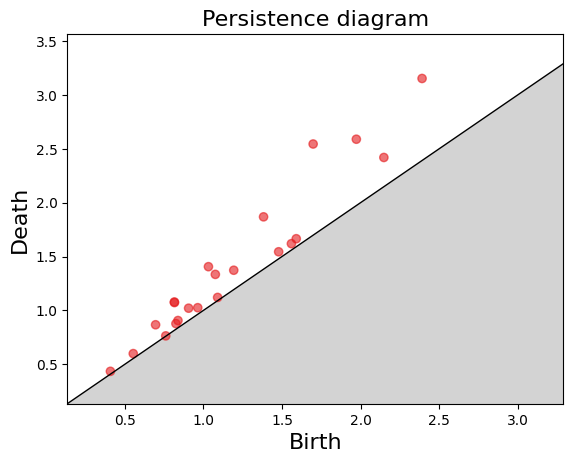

In [31]:
rips = gudhi.RipsComplex(points = np.array(TD_cos)[0]).create_simplex_tree(max_dimension=2)
pers = rips.compute_persistence()

gudhi.plot_persistence_diagram(pers)

In [30]:
dgms[0]

array([[0.4084973 , 0.43477986],
       [0.55387655, 0.59925646],
       [0.76066695, 0.7638337 ],
       [0.69598274, 0.86697613],
       [0.82532511, 0.87773755],
       [0.83835329, 0.90625908],
       [0.90605103, 1.02067847],
       [0.96411198, 1.02536939],
       [0.81599714, 1.07301233],
       [0.81539293, 1.07825418],
       [1.09060906, 1.12057211],
       [1.07617594, 1.33447602],
       [1.19320081, 1.37299529],
       [1.03226183, 1.40604582],
       [1.4789654 , 1.54431703],
       [1.56006637, 1.61967589],
       [1.59096225, 1.66546064],
       [1.3828837 , 1.86843043],
       [2.14837466, 2.41947331],
       [1.69837926, 2.5446305 ],
       [1.97326337, 2.5889382 ],
       [2.39145602, 3.15269324]])